In [1]:
import nlsy
import numpy as np
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from pandas.plotting import scatter_matrix
sns.set(style="ticks", color_codes=True)
%matplotlib inline

NLSY_db = nlsy.NLSY_database("data.db")
(cohort_79, cohort_97) = NLSY_db.cohorts
c97=cohort_97.data(impute_values=False)
c79=cohort_79.data(impute_values=False)
c97["cohort"]=97
c79['cohort']=79
#concatenation of the two datasets.
frames = [c79,c97]
df = pd.concat(frames, keys=['79', '97'])

# Exploratory Data Analysis

# # Boxplot

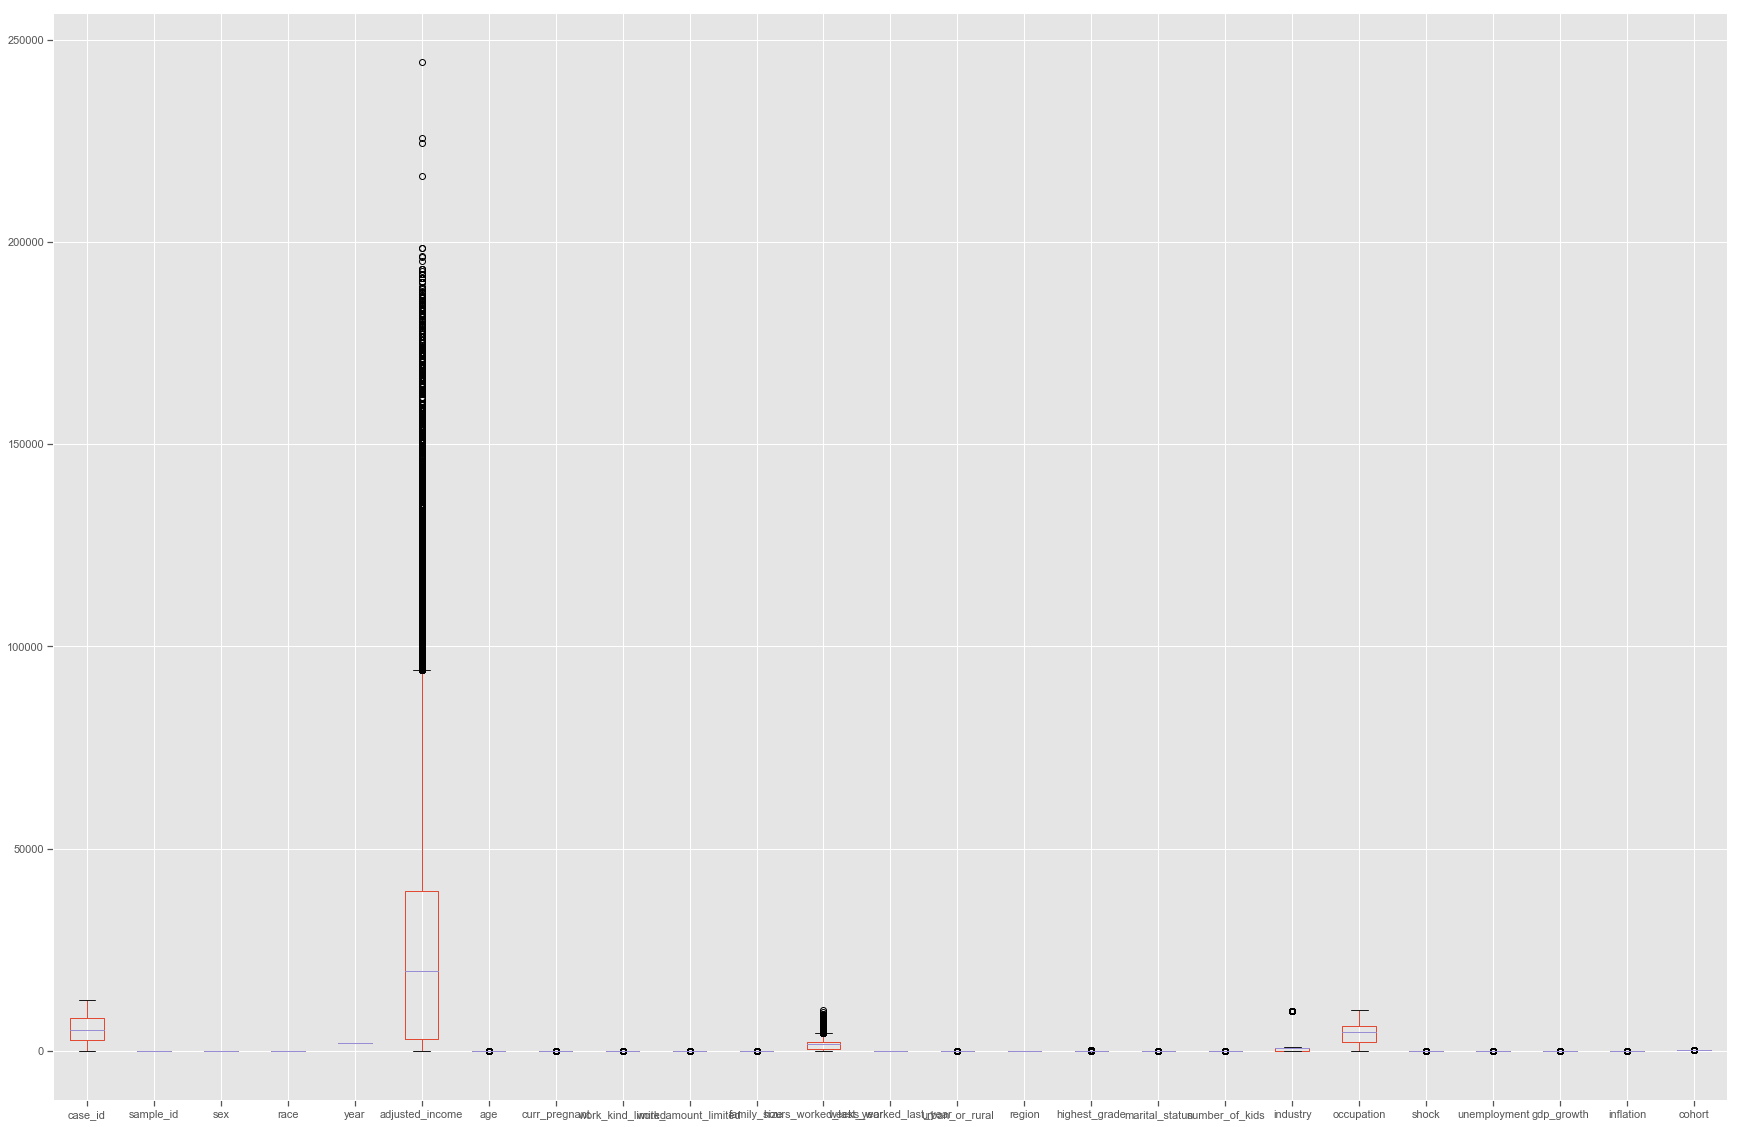

In [2]:
matplotlib.style.use('ggplot')
df.plot(kind='box',figsize=(30,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B65F571710>,
      dtype=object)

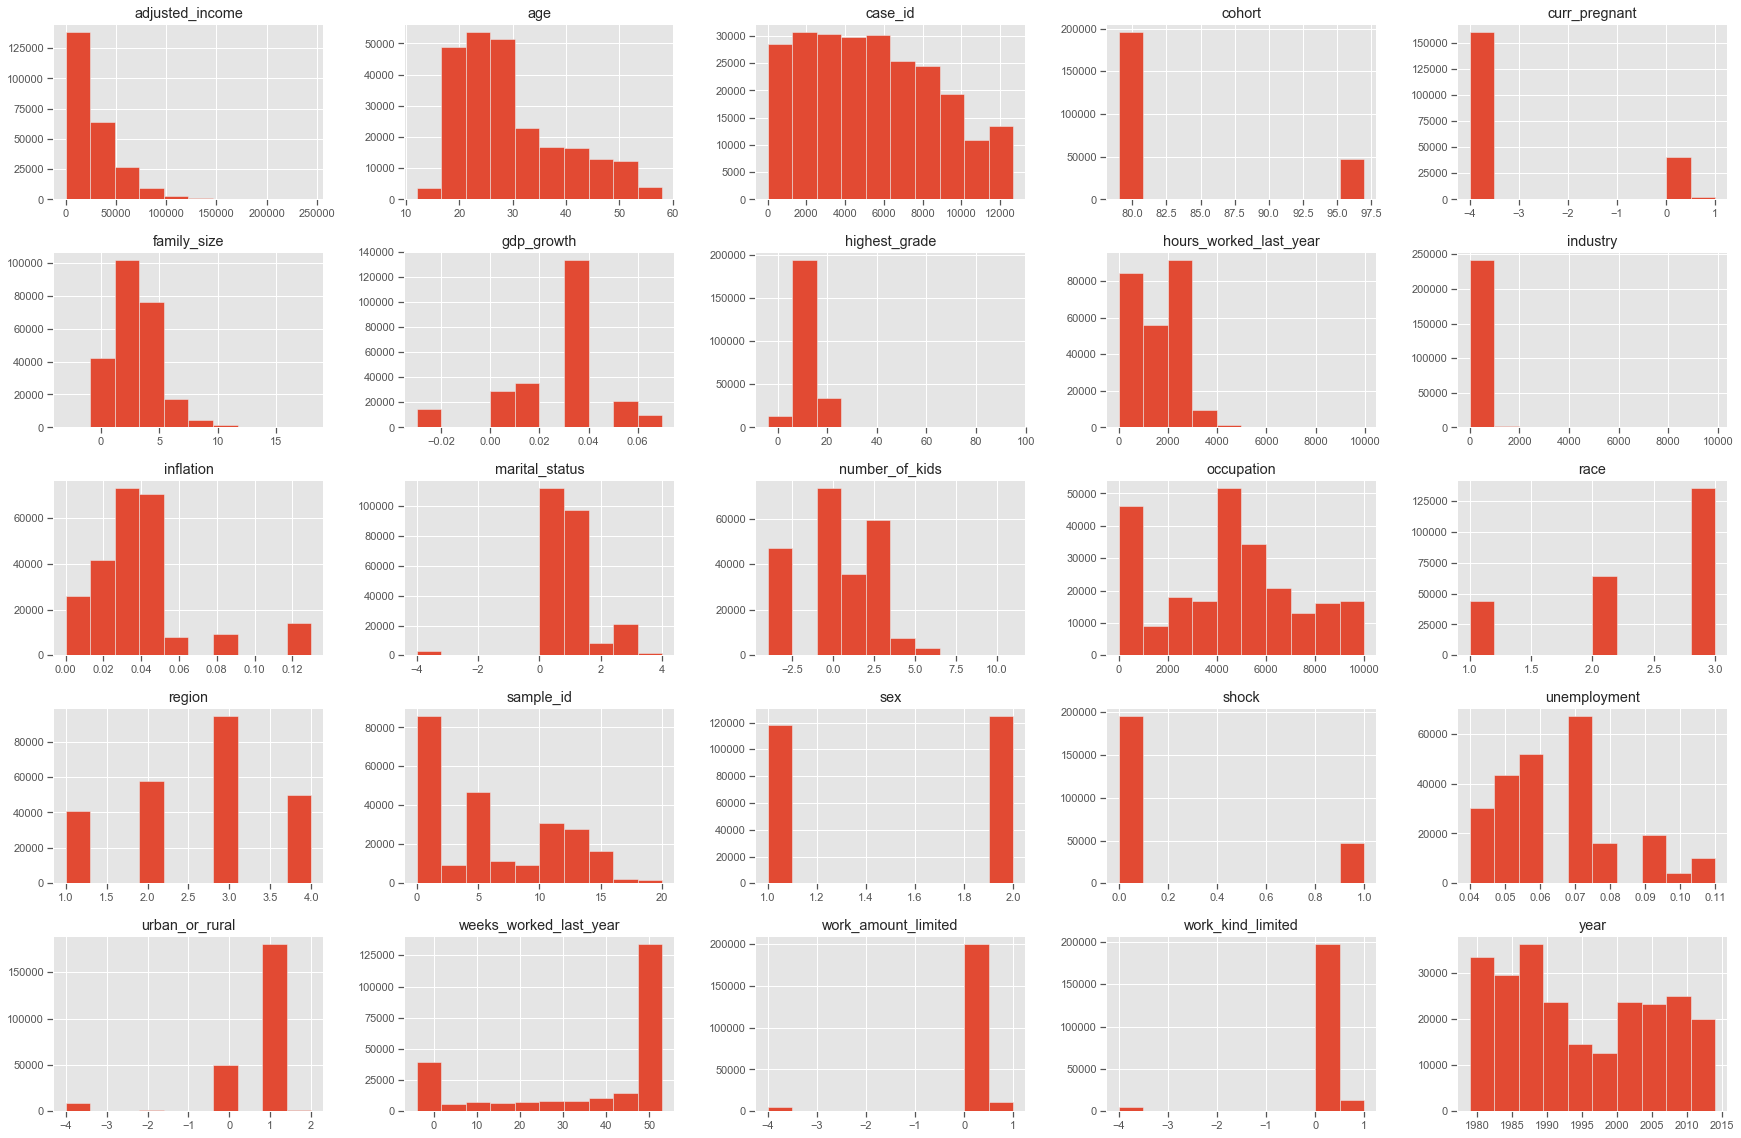

In [3]:
#all instances
df.hist(figsize=(30,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6636A6BA8>,
      dtype=object)

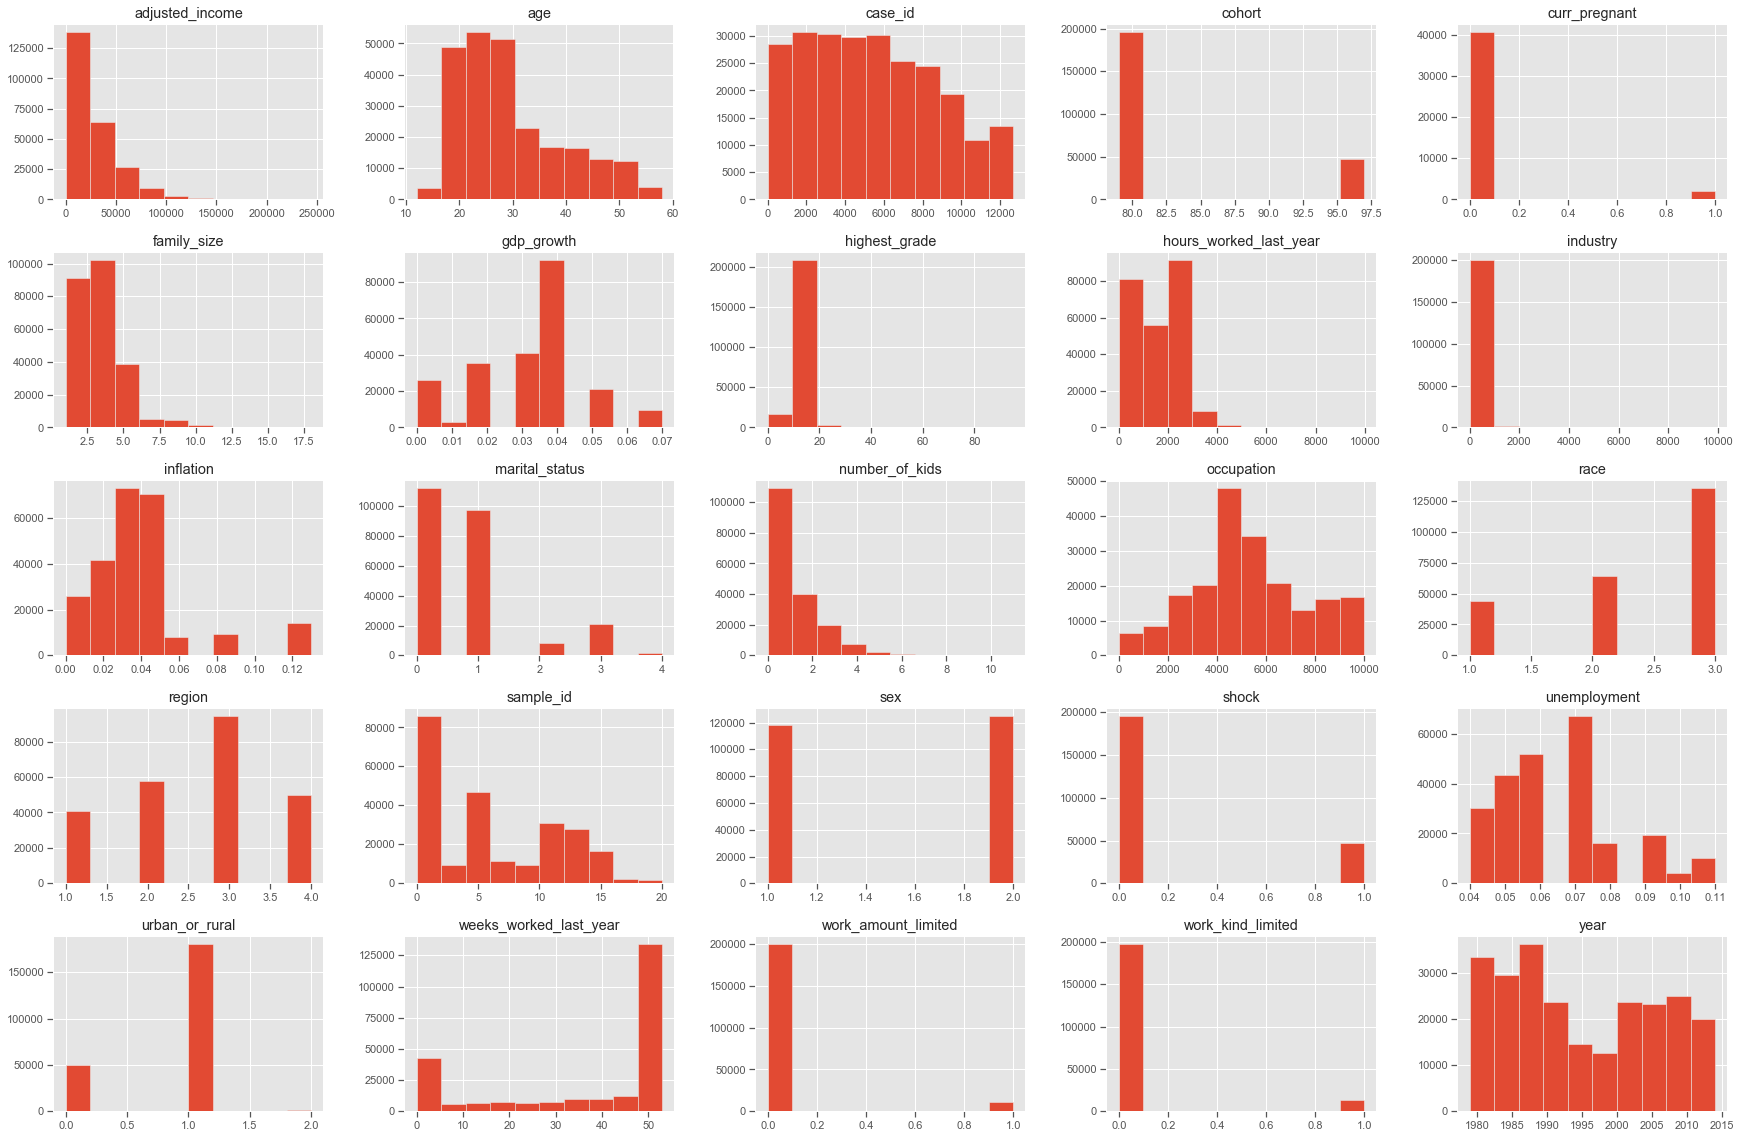

In [4]:
#droped all negative values
df_selected=df[df[df.columns]>=0]
df_selected.hist(figsize=(30,20))

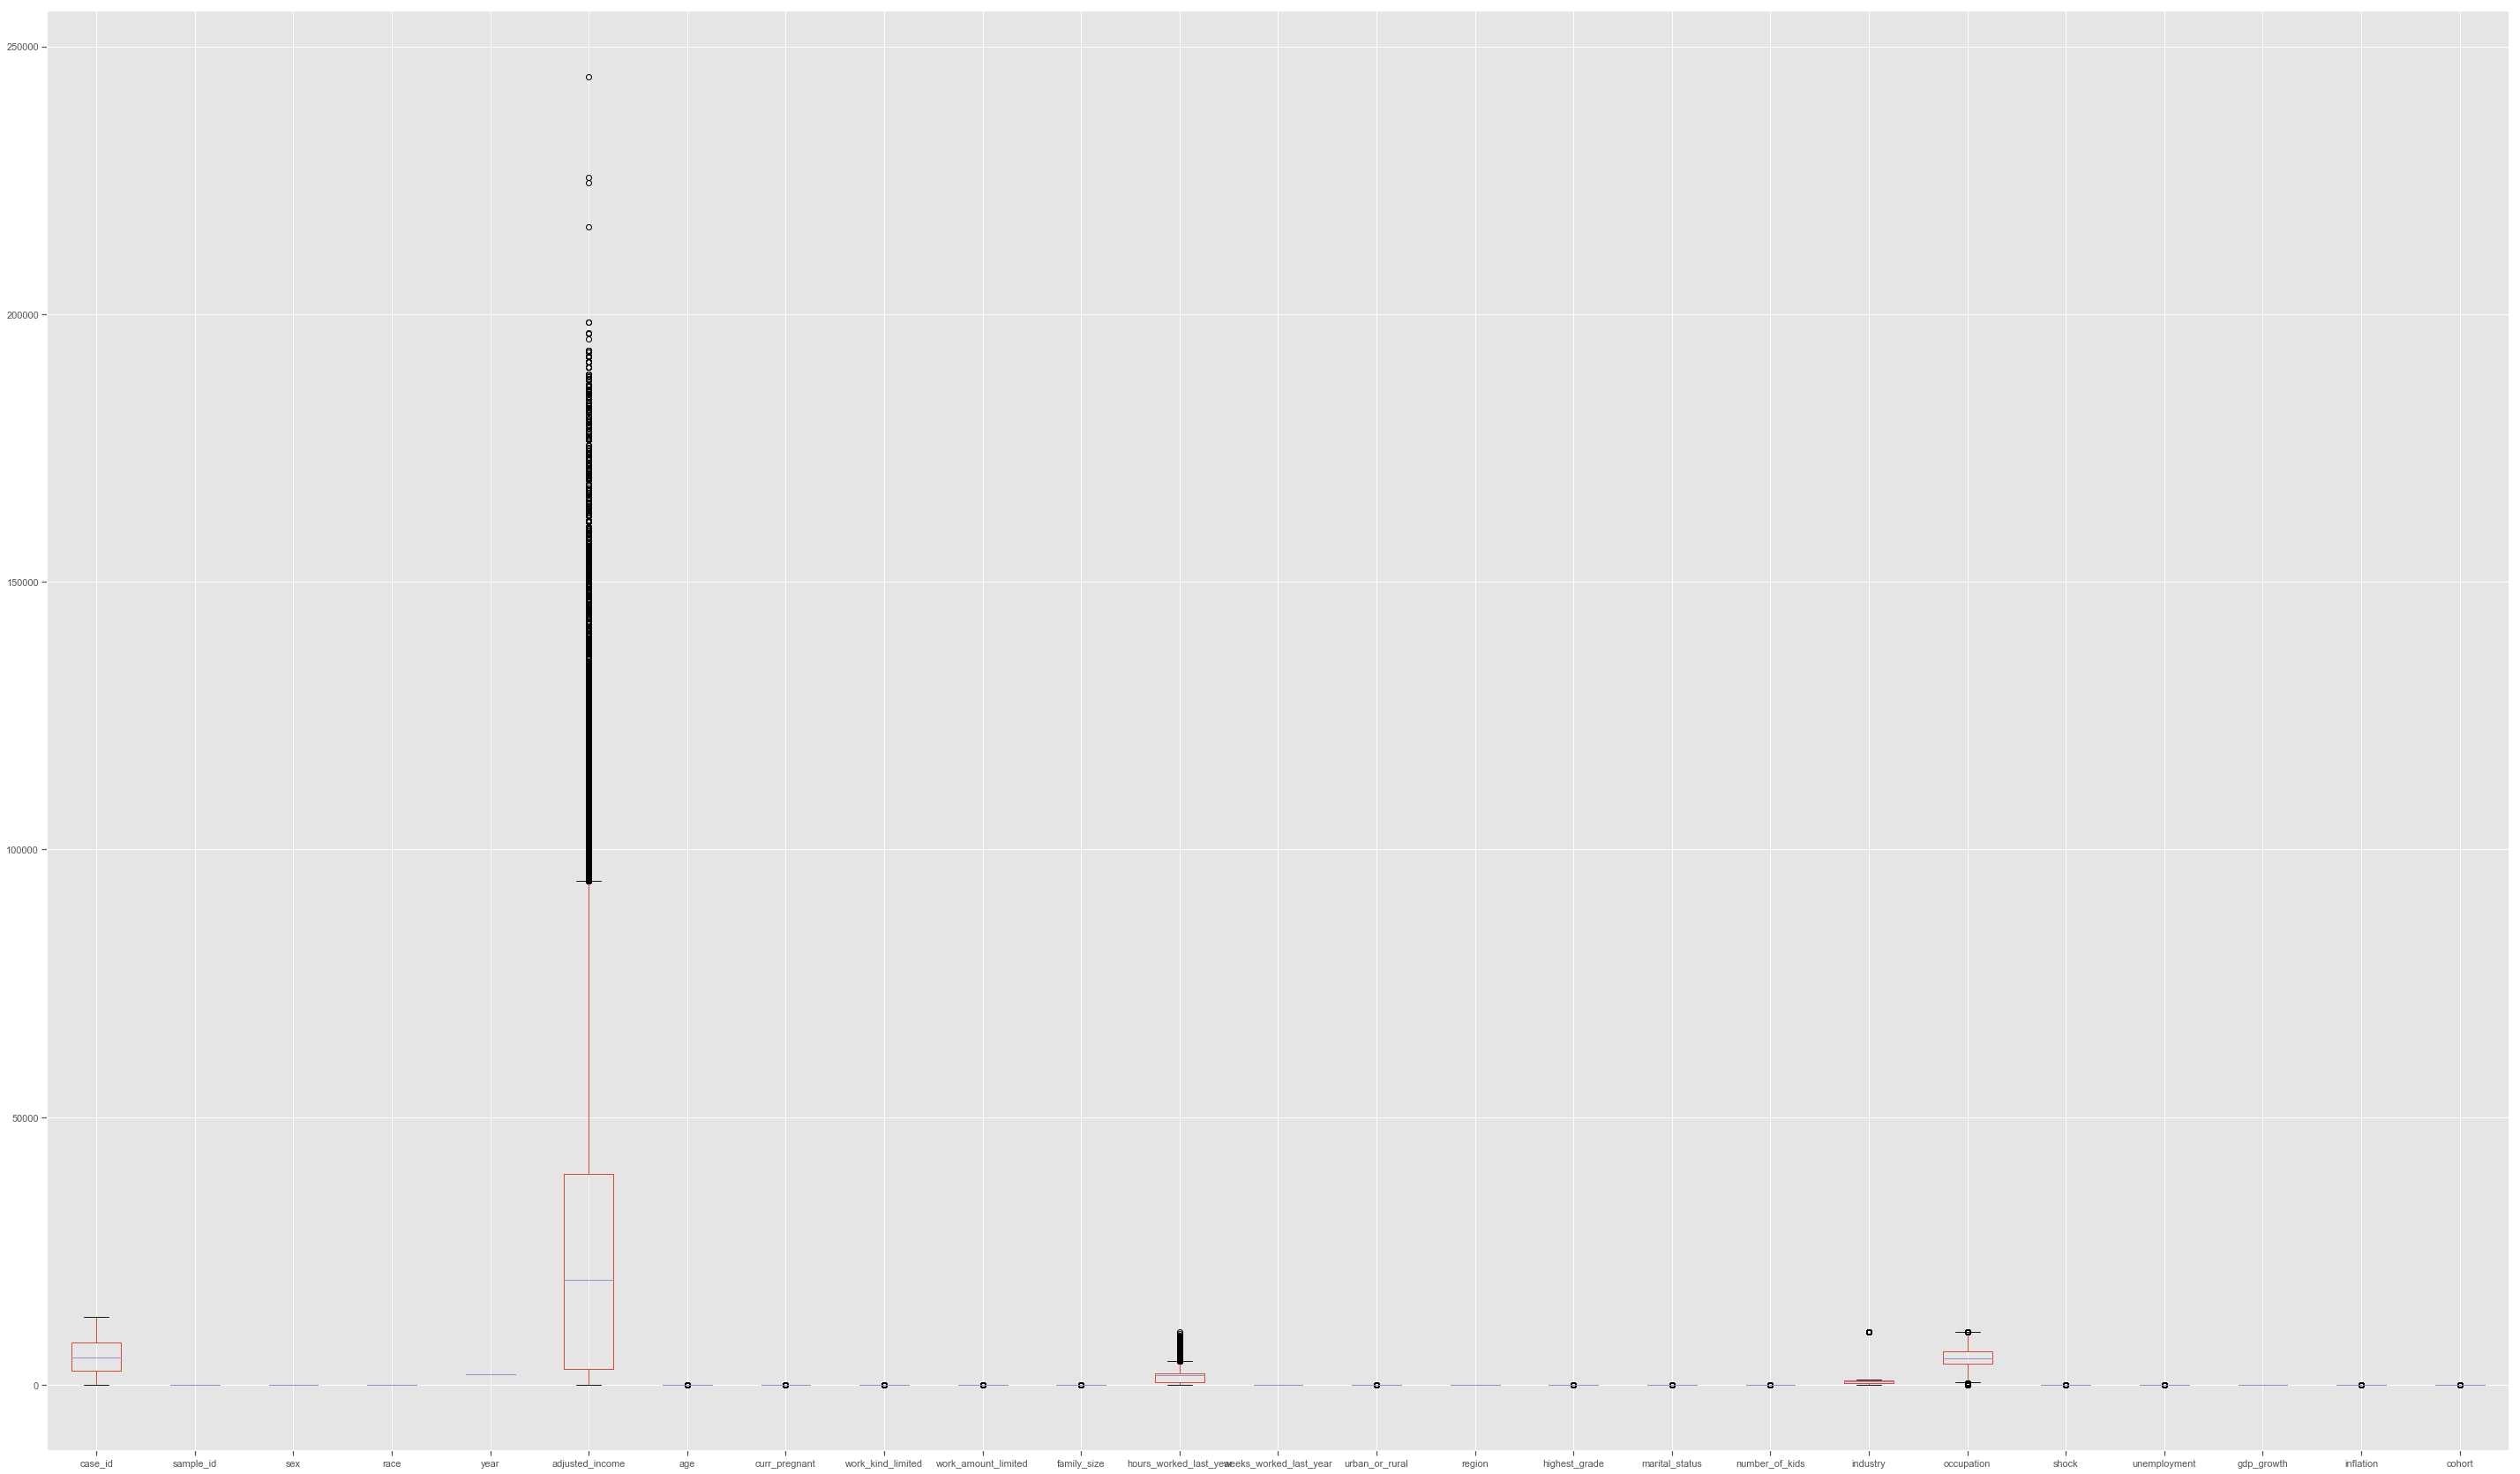

In [5]:
df_selected.plot(kind='box',figsize=(50,30))

In [6]:
Features = df_selected[[ 'sex', 'race','year', 'adjusted_income','age','curr_pregnant', 'work_kind_limited','work_amount_limited',
       'family_size', 'hours_worked_last_year', 'weeks_worked_last_year',
       'urban_or_rural', 'region', 'highest_grade', 'marital_status',
       'number_of_kids', 'shock', 'unemployment', 'gdp_growth', 'inflation',
       'cohort']]
'''scatter_matrix(features, alpha=0.2, figsize=(30,20), diagonal="kde")'''

'scatter_matrix(features, alpha=0.2, figsize=(30,20), diagonal="kde")'

In [7]:
#takes forever to load
#g = sns.pairplot(data=Features, hue='shock', dropna=True)

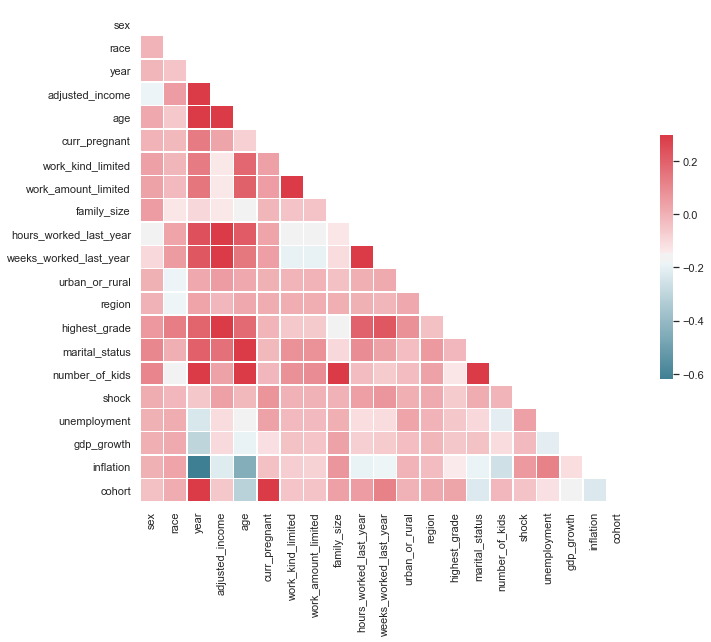

In [8]:
from string import ascii_letters as letters
sns.set(style="white")
sns.set_palette("Set2")
# Compute the correlation matrix
corr = Features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

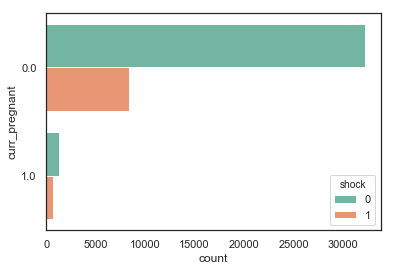

In [9]:
cp = sns.countplot(y='curr_pregnant', hue='shock', data=df_selected,)

C:\Users\pqy94\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


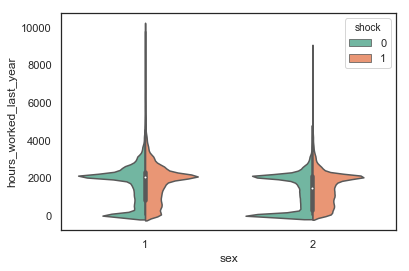

In [10]:
sns.violinplot(x="sex", y='hours_worked_last_year', hue='shock',split=True, data=df_selected,)

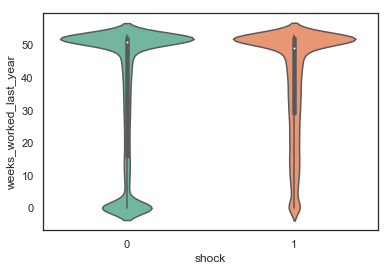

In [11]:
ai = sns.violinplot(x="shock", y='weeks_worked_last_year', data=df_selected,)

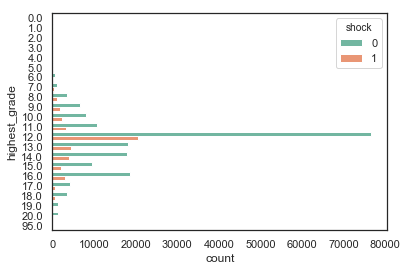

In [12]:
hg = sns.countplot(y='highest_grade', hue='shock', data=df_selected,)

C:\Users\pqy94\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\pqy94\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\pqy94\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pqy94\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\pqy94\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


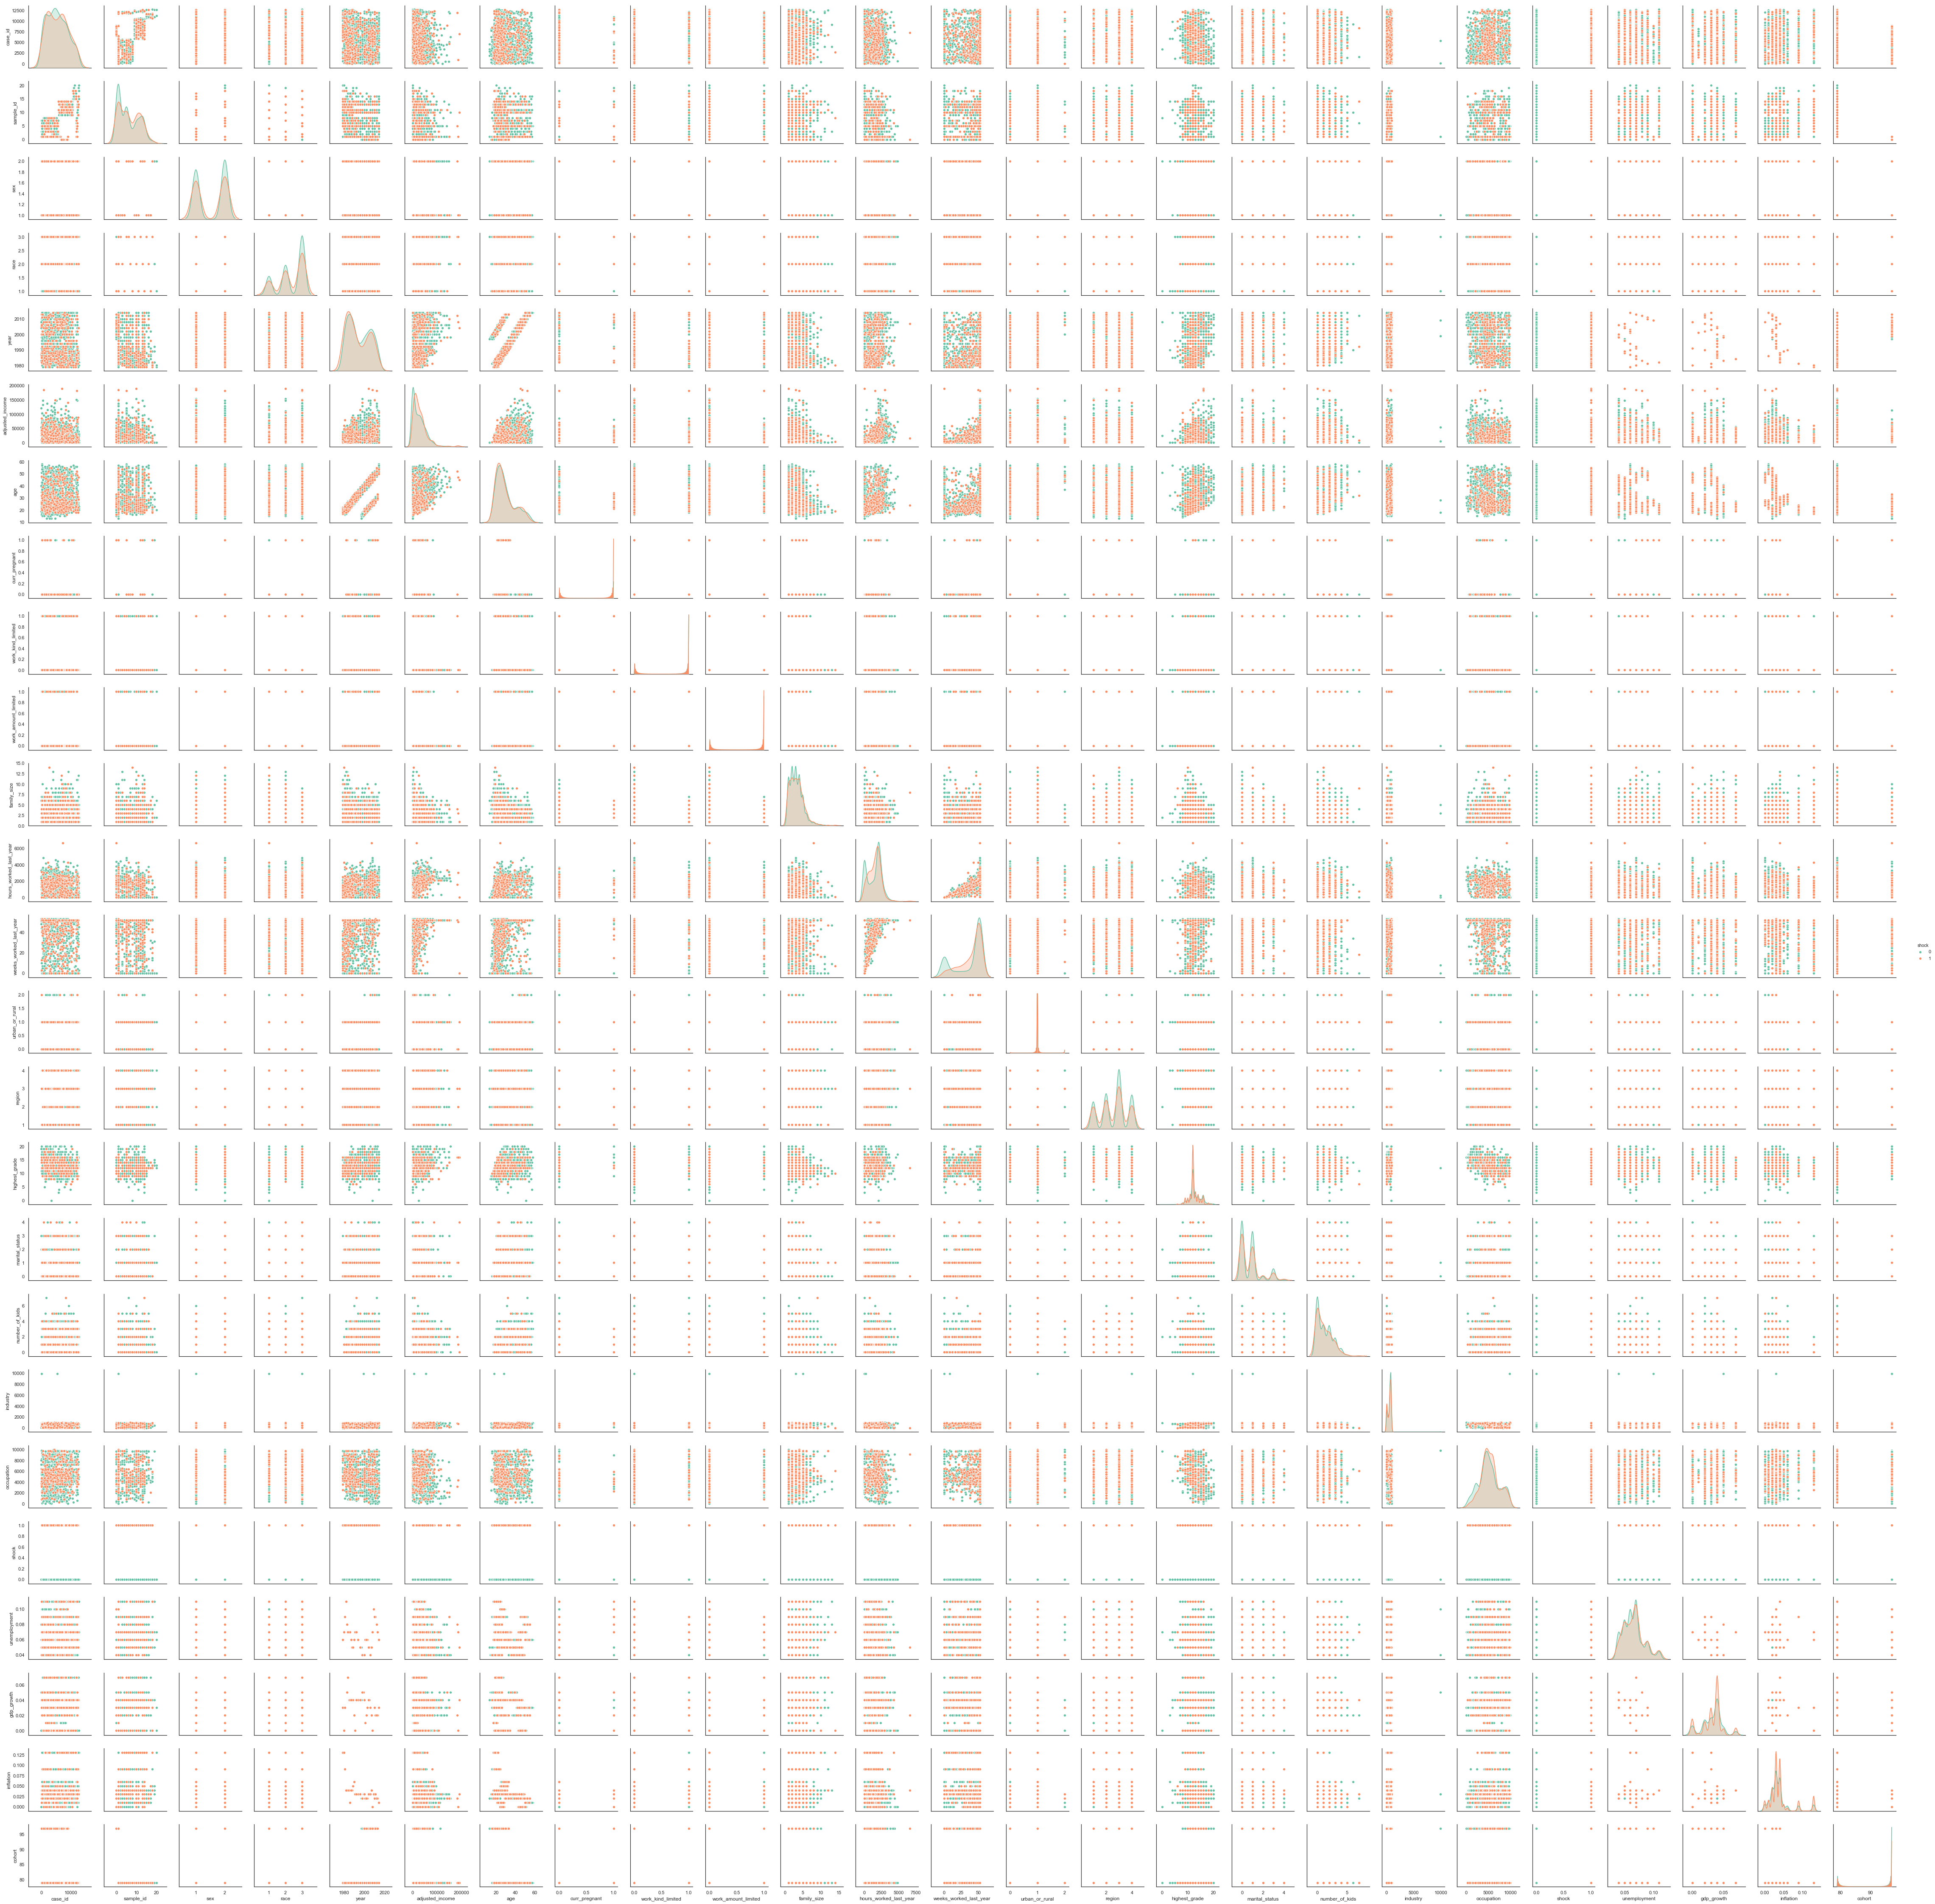

In [13]:
g = sns.pairplot(df_selected.sample(2000), hue='shock', dropna=True)
#scatter_matrix(Features, alpha=0.2, figsize=(30,20), diagonal="kde")

# Feature Analysis

In [14]:
import os
import numpy as np
import pandas as pd
import yellowbrick as yb
from yellowbrick.features import RadViz

C:\Users\pqy94\Anaconda3\lib\site-packages\yellowbrick\utils\nan_warnings.py:66: DataWarning: Warning! Found 212950 rows of 242901 (87.67%) with nan values. Only complete rows will be plotted.
  warnings.warn(warning_message, DataWarning)


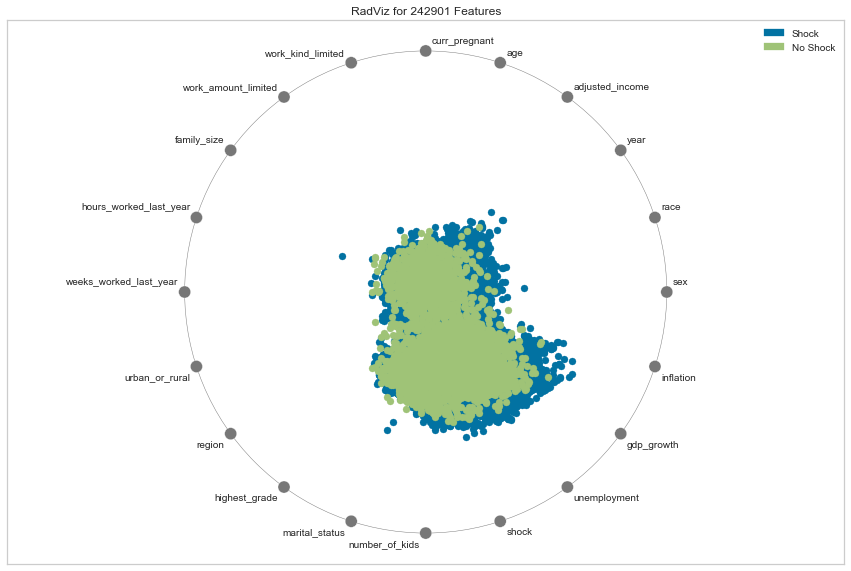

In [15]:
X = Features[['sex', 'race', 'year', 'adjusted_income', 'age',
       'curr_pregnant', 'work_kind_limited', 'work_amount_limited',
       'family_size', 'hours_worked_last_year', 'weeks_worked_last_year',
       'urban_or_rural', 'region', 'highest_grade', 'marital_status',
       'number_of_kids', 'unemployment', 'gdp_growth', 'inflation',
       'cohort']].values
y = Features['shock'].values
classes = ["Shock", "No Shock"]
# Instantiate the visualizer
visualizer = RadViz(size=(1080, 720), classes=classes, features=Features)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.poof()              # Draw/show/poof the data

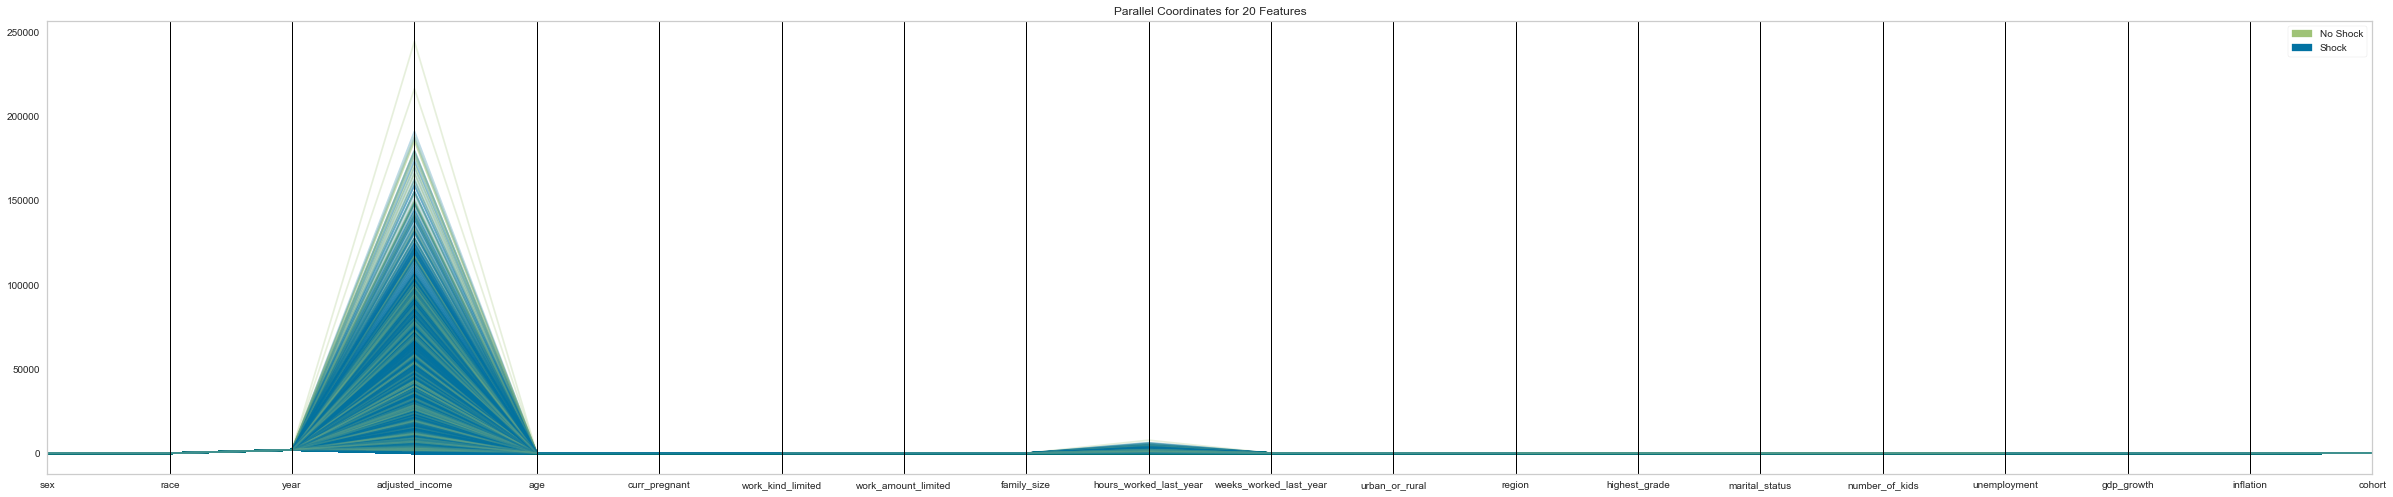

In [16]:

from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
features = ['sex', 'race', 'year', 'adjusted_income', 'age',
       'curr_pregnant', 'work_kind_limited', 'work_amount_limited',
       'family_size', 'hours_worked_last_year', 'weeks_worked_last_year',
       'urban_or_rural', 'region', 'highest_grade', 'marital_status',
       'number_of_kids', 'unemployment', 'gdp_growth', 'inflation',
       'cohort'
]
classes = ["Shock", "No Shock"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, 
    shuffle=True, size=(3000, 600)
)

# Fit and transform the data to the visualizer
visualizer.fit(X, y)
visualizer.transform(X)

# Finalize the title and axes then display the visualization
visualizer.poof()

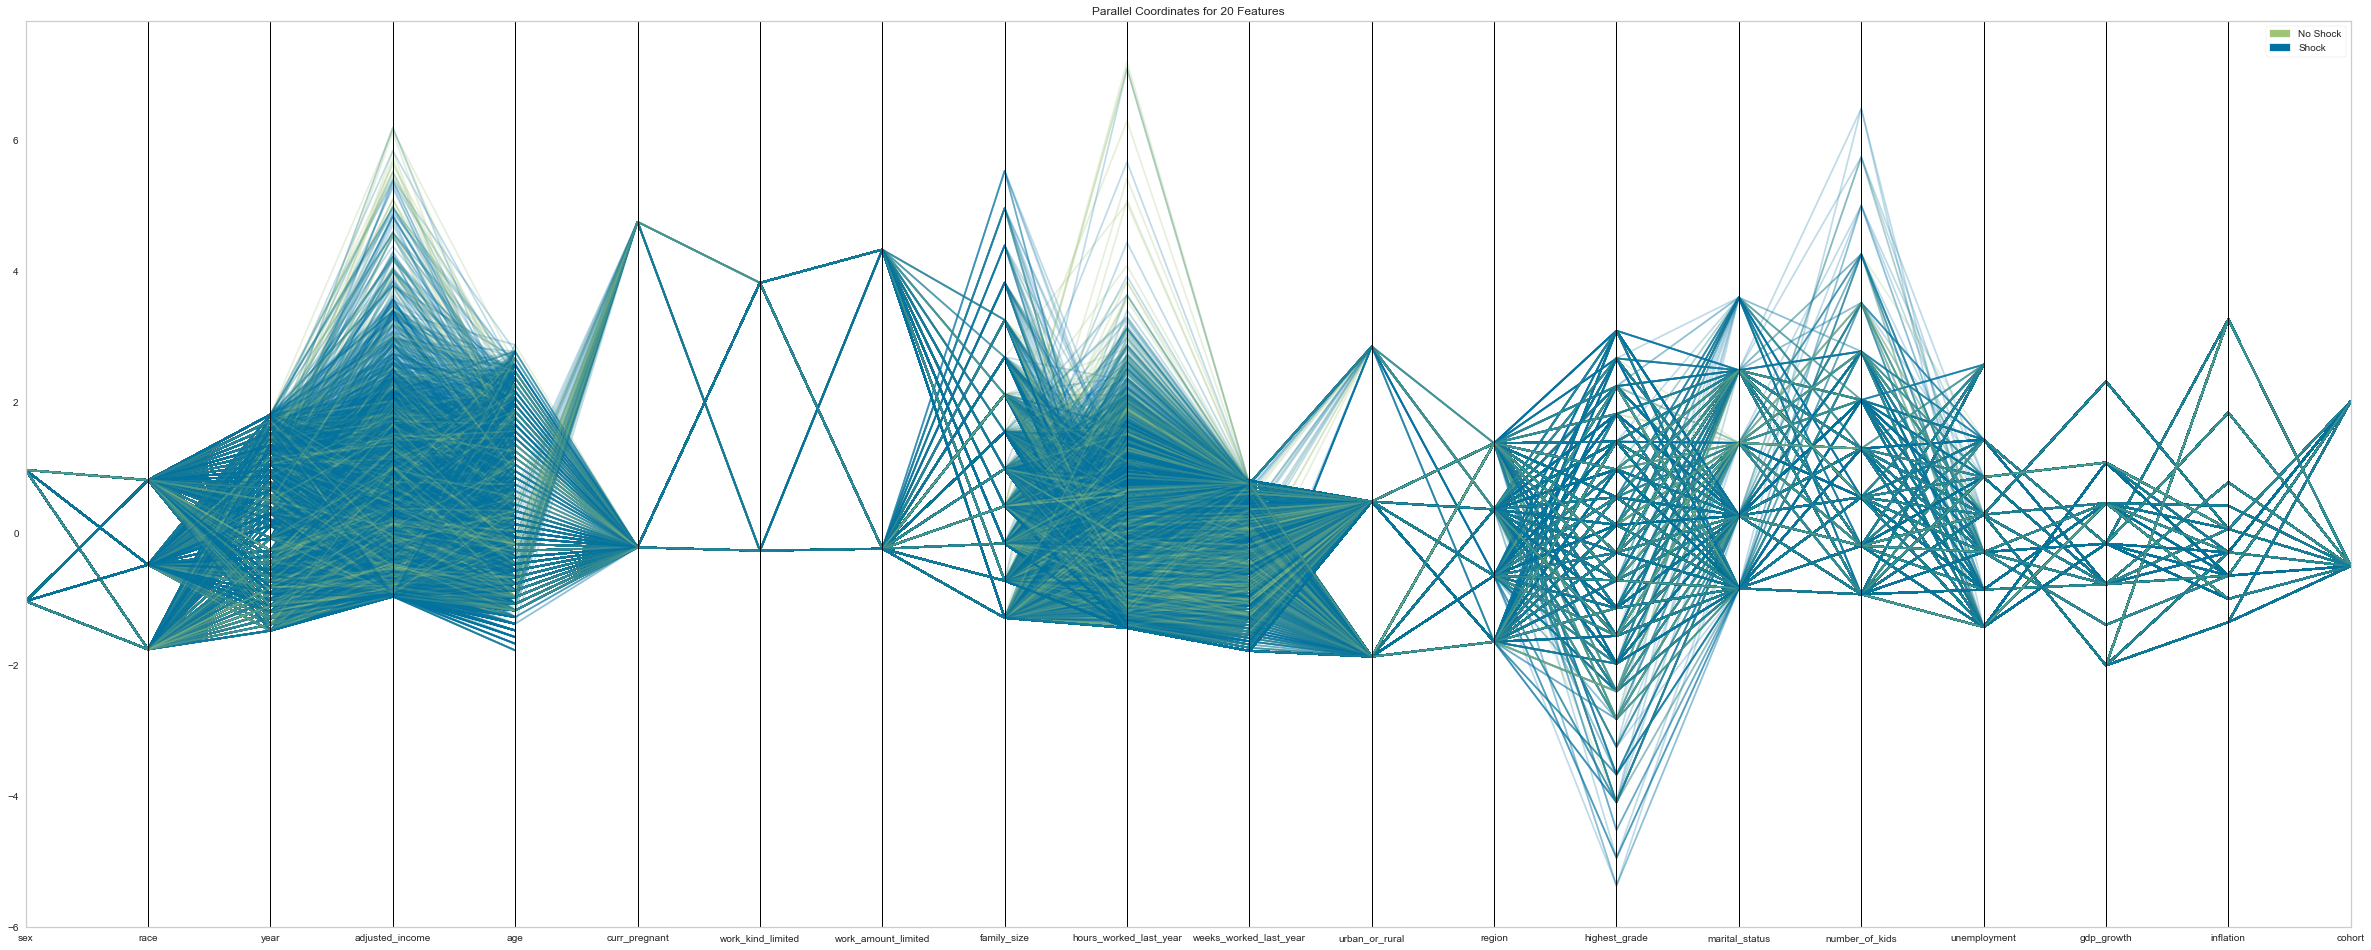

In [17]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', # This time we'll specify a normalizer
    sample=0.05, shuffle=True, size=(3000, 1200)
)

# Fit the visualizer and display it
visualizer.fit(X, y)
visualizer.transform(X)

visualizer.poof()

# Feature Selection and Engineering

In [18]:
import os
import zipfile
import requests
import pandas as pd


from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Lasso Model

After all null variable droped, adjusted_income and hours_worked_last_year are the only important features by Lasso Model 

In [19]:
model = Lasso()
model.fit(df_selected.dropna()[features], df_selected.dropna()['shock'])
Lasso_Coef=list(zip(features, model.coef_.tolist()))
print(Lasso_Coef)

[('sex', -0.0), ('race', -0.0), ('year', -0.0), ('adjusted_income', -8.01652016248785e-07), ('age', -0.0), ('curr_pregnant', 0.0), ('work_kind_limited', 0.0), ('work_amount_limited', 0.0), ('family_size', 0.0), ('hours_worked_last_year', 2.342382083238556e-06), ('weeks_worked_last_year', 0.0), ('urban_or_rural', -0.0), ('region', 0.0), ('highest_grade', -0.0), ('marital_status', 0.0), ('number_of_kids', 0.0), ('unemployment', 0.0), ('gdp_growth', 0.0), ('inflation', 0.0), ('cohort', -0.0)]


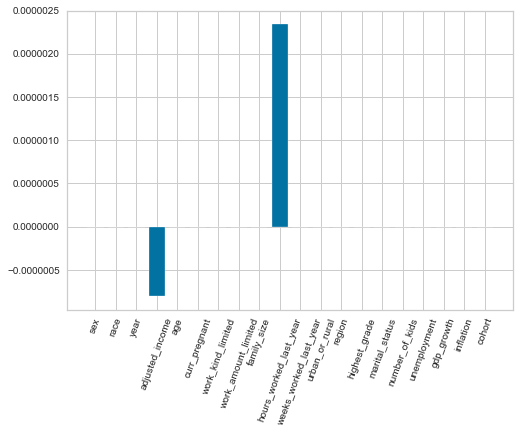

In [20]:
plt.bar(range(len(Lasso_Coef)), [val[1] for val in Lasso_Coef], align='center')
plt.xticks(range(len(Lasso_Coef)), [val[0] for val in Lasso_Coef])
plt.xticks(rotation=70)
plt.show()

# Ridge Regression

Ridge Regression returns coefficient for all features

In [21]:
model = Ridge()
model.fit(df_selected.dropna()[features], df_selected.dropna()['shock'])
Ridge_Coef=list(zip(features, model.coef_.tolist()))
print(Ridge_Coef)

[('sex', -0.0763820675836775), ('race', 0.009107631227936572), ('year', -0.005992530815954552), ('adjusted_income', 6.535128735575647e-07), ('age', 0.000881231638652581), ('curr_pregnant', 0.23282497912175082), ('work_kind_limited', 0.056972519567544365), ('work_amount_limited', 0.04231682273178624), ('family_size', 0.002053833501263941), ('hours_worked_last_year', -2.4020515067583196e-05), ('weeks_worked_last_year', 0.0014409207407130018), ('urban_or_rural', -0.0027740038700925767), ('region', 0.013364850033675423), ('highest_grade', -0.024030388123338103), ('marital_status', 0.014361942697992453), ('number_of_kids', 0.022857408436457113), ('unemployment', 0.15885986423578413), ('gdp_growth', 0.2570868139679066), ('inflation', 0.21266455457592007), ('cohort', 0.00864180165777647)]


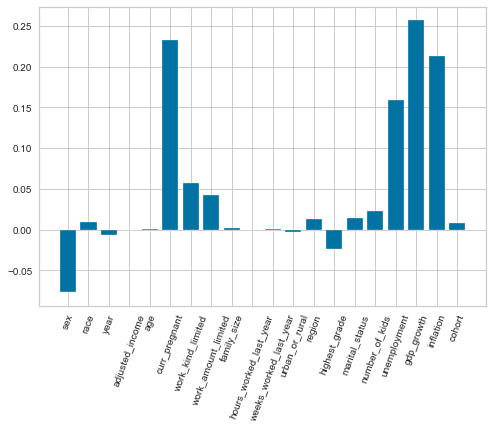

In [22]:
plt.bar(range(len(Ridge_Coef)), [val[1] for val in Ridge_Coef], align='center')
plt.xticks(range(len(Ridge_Coef)), [val[0] for val in Ridge_Coef])
plt.xticks(rotation=70)
plt.show()

In [23]:
model = ElasticNet()
model.fit(df_selected.dropna()[features], df_selected.dropna()['shock'])
ElasticNet_Coef=list(zip(features, model.coef_.tolist()))
print(ElasticNet_Coef)

[('sex', -0.0), ('race', -0.0), ('year', -0.0), ('adjusted_income', -8.444168596150681e-07), ('age', -0.0), ('curr_pregnant', 0.0), ('work_kind_limited', 0.0), ('work_amount_limited', 0.0), ('family_size', 0.0), ('hours_worked_last_year', 3.6692576307374802e-06), ('weeks_worked_last_year', 0.0), ('urban_or_rural', -0.0), ('region', 0.0), ('highest_grade', -0.0), ('marital_status', 0.0), ('number_of_kids', 0.0), ('unemployment', 0.0), ('gdp_growth', 0.0), ('inflation', 0.0), ('cohort', -0.0)]


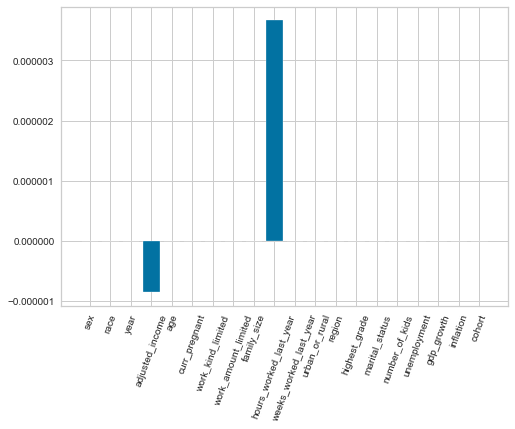

In [24]:
plt.bar(range(len(ElasticNet_Coef)), [val[1] for val in ElasticNet_Coef], align='center')
plt.xticks(range(len(ElasticNet_Coef)), [val[0] for val in ElasticNet_Coef])
plt.xticks(rotation=70)
plt.show()

# Priliminary Modeling and Evaluation

In [25]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

from yellowbrick.classifier import ClassificationReport

In [26]:
'''test which one has the higest F-score among SVC, NuSVC, LinearSVC, SGDClassifier，kenighborClassifier, Logistic Regression, 
LogisticregressionCV, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier'''
X=df_selected.dropna()[features]
y=df_selected.dropna()['shock']

model_fscore=[]
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)  
    
    expected  = y
    predicted = model.predict(X)
    model_fscore.append((estimator.__class__.__name__, f1_score(expected, predicted)))
    print(model_fscore)
    # Compute and return F1 (harmonic mean of precision and recall)
    #print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

In [27]:
models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X,y, model)

C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are det

[('SVC', 0.0)]
[('SVC', 0.0), ('NuSVC', 0.5014319809069212)]


C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[('SVC', 0.0), ('NuSVC', 0.5014319809069212), ('LinearSVC', 0.6290635091496233)]


C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[('SVC', 0.0), ('NuSVC', 0.5014319809069212), ('LinearSVC', 0.6290635091496233), ('SGDClassifier', 0.2425867977946655)]


C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[('SVC', 0.0), ('NuSVC', 0.5014319809069212), ('LinearSVC', 0.6290635091496233), ('SGDClassifier', 0.2425867977946655), ('KNeighborsClassifier', 0.4034048852701702)]


C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the rang

[('SVC', 0.0), ('NuSVC', 0.5014319809069212), ('LinearSVC', 0.6290635091496233), ('SGDClassifier', 0.2425867977946655), ('KNeighborsClassifier', 0.4034048852701702), ('LogisticRegression', 0.4098277608915907)]


C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

[('SVC', 0.0), ('NuSVC', 0.5014319809069212), ('LinearSVC', 0.6290635091496233), ('SGDClassifier', 0.2425867977946655), ('KNeighborsClassifier', 0.4034048852701702), ('LogisticRegression', 0.4098277608915907), ('LogisticRegressionCV', 0.019044380207447715)]
[('SVC', 0.0), ('NuSVC', 0.5014319809069212), ('LinearSVC', 0.6290635091496233), ('SGDClassifier', 0.2425867977946655), ('KNeighborsClassifier', 0.4034048852701702), ('LogisticRegression', 0.4098277608915907), ('LogisticRegressionCV', 0.019044380207447715), ('BaggingClassifier', 0.9280502447584742)]


C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[('SVC', 0.0), ('NuSVC', 0.5014319809069212), ('LinearSVC', 0.6290635091496233), ('SGDClassifier', 0.2425867977946655), ('KNeighborsClassifier', 0.4034048852701702), ('LogisticRegression', 0.4098277608915907), ('LogisticRegressionCV', 0.019044380207447715), ('BaggingClassifier', 0.9280502447584742), ('ExtraTreesClassifier', 0.9999137112779359)]


C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[('SVC', 0.0), ('NuSVC', 0.5014319809069212), ('LinearSVC', 0.6290635091496233), ('SGDClassifier', 0.2425867977946655), ('KNeighborsClassifier', 0.4034048852701702), ('LogisticRegression', 0.4098277608915907), ('LogisticRegressionCV', 0.019044380207447715), ('BaggingClassifier', 0.9280502447584742), ('ExtraTreesClassifier', 0.9999137112779359), ('RandomForestClassifier', 0.9999137112779359)]


C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


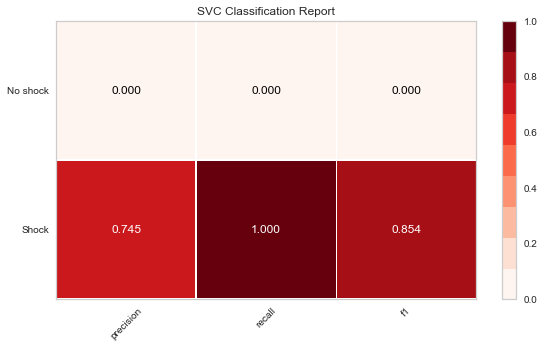

C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


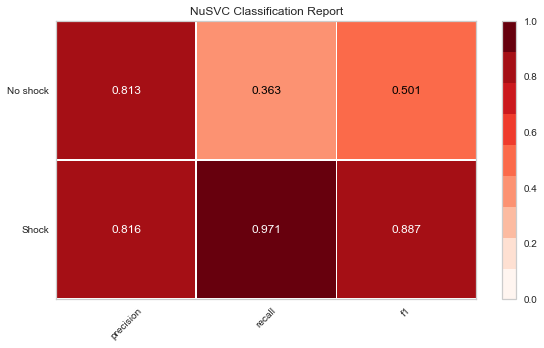

C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


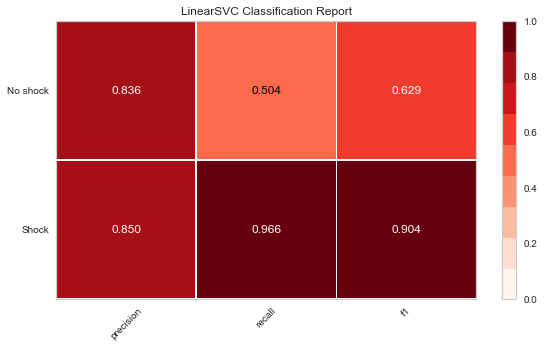

C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


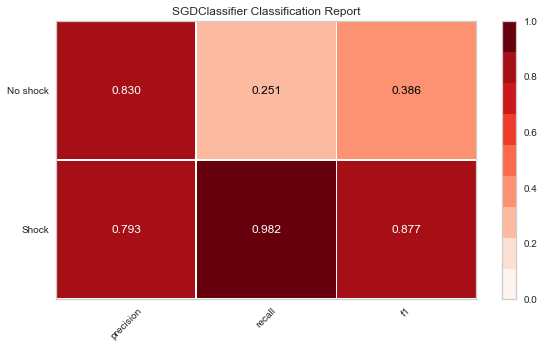

C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


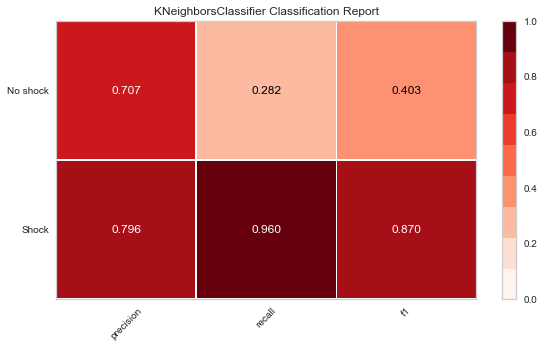

C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


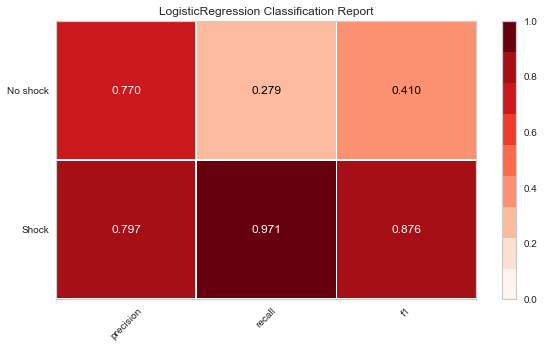

C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pqy

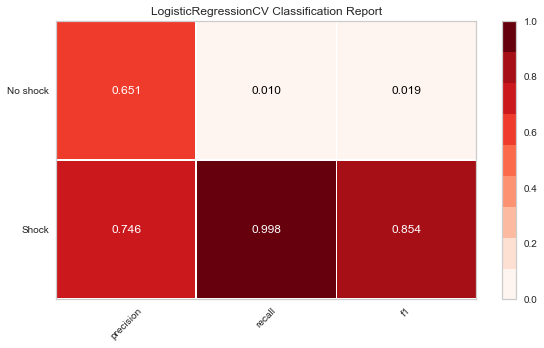

C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


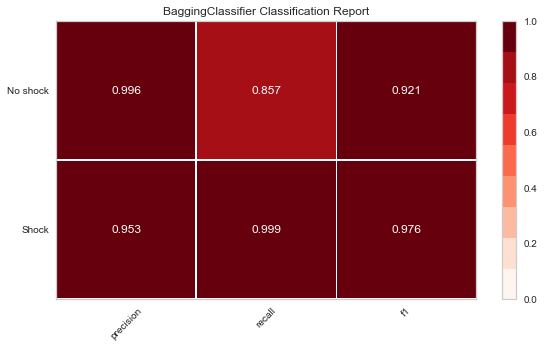

C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


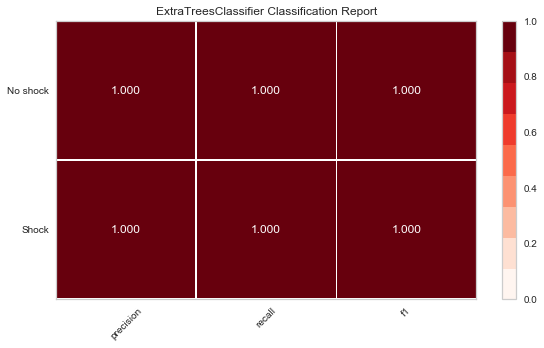

C:\Users\pqy94\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


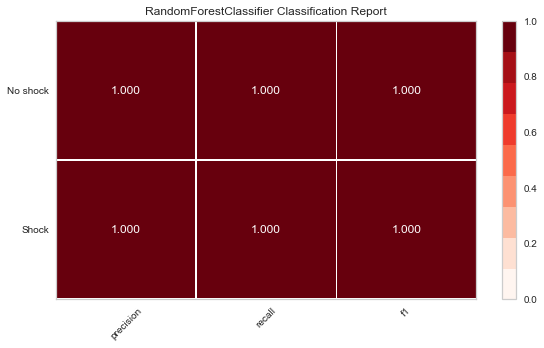

In [28]:
def visualize_model(X, y, estimator):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['Shock', 'No shock'], 
        cmap="Reds", size=(600, 360)
    )
    visualizer.fit(X, y)  
    visualizer.score(X, y)
    visualizer.poof()  

for model in models:
    visualize_model(X, y, model)